## Explore an online model of prior learning

author: steeve laquitaine

Setup virtual environment:

```bash
python -m venv my_env
source my_env/bin/activate
pip install -r requirements.txt
````

In [185]:
# setup dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import numpy as np
from scipy.stats import norm, uniform
import copy

# set project's path (path where it was cloned)
proj_path = "/Users/laquitai/Desktop/projects/project/projInference"
os.chdir(proj_path)

## Load dataset

In [8]:
# load dataset
data = pd.read_csv("data/csv/data01_direction4priors.csv")

## Create two generative processes of motion direction

The direction generative process is Gaussian instead of von Mises, for simplicity.

In [419]:
def build_generative_model(std, mean):
    """create hidden generative process for motion direction
    the experimental Gaussian prior
    """
    # set direction state space
    x = np.arange(1, 360, 1)

    # calculate probability distribution
    pdf = norm.pdf(x, loc=mean, scale=std)
    pdf /= sum(pdf)
    return pdf

def generate_directions(mean, std, n_trials, seed):
    return np.round(norm.rvs(loc=mean, scale=std, size=n_trials, random_state=seed))


def learn_generative_process(motion_directions, learning_rate, x, n_trials):
    """learn the generative process
    """
    # set subject initial belief state
    initial_prior = uniform.pdf(x, loc=x[0], scale=x[-1])
    initial_prior /= sum(initial_prior)
    prior = copy.copy(initial_prior)
    observed = np.zeros((len(x)))
    prediction_errors = []
    priors = []

    for old_trial in range(0, n_trials):

        # locate the observed state component
        state_loc = np.where(x == int(motion_directions[old_trial]))[0][0]

        # compute its state prediction error
        state_pred_error = learning_rate * (1 - prior[state_loc])

        # use the prediction error to update the state belief
        prior[state_loc] = prior[state_loc] + state_pred_error
        prior /= sum(prior)

        # tape
        prediction_errors.append(state_pred_error)
        priors.append(copy.copy(prior))
    return priors

### Generative model 1

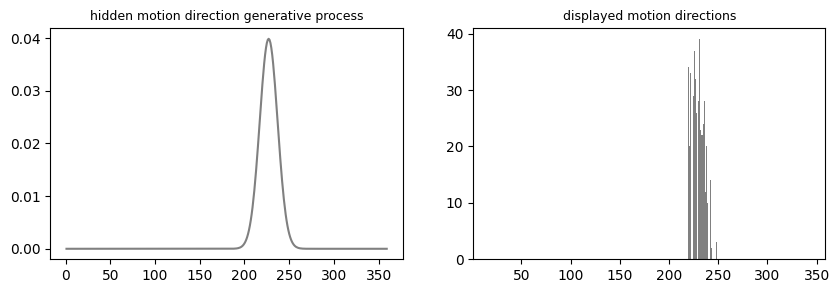

In [444]:
# set generative model parameters
MEAN = 227
STD = 10
N_TRIALS = 800
SEED = 0

# build generative model
pdf = build_generative_model(STD, MEAN)

# generate directions
directions_prior01 = generate_directions(mean=MEAN, std=STD, n_trials=N_TRIALS, seed=SEED)

# plot the generative process
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
ax1.plot(x, pdf, color= "gray");
ax1.set_title("hidden motion direction generative process", fontsize=9);

# plot generated motion direction distribution
ax2.hist(directions_prior01, color="gray", bins=180);
ax2.set_title("displayed motion directions", fontsize=9);
ax2.set_xlim([x[0], x[-1]]);

### Generative model 2

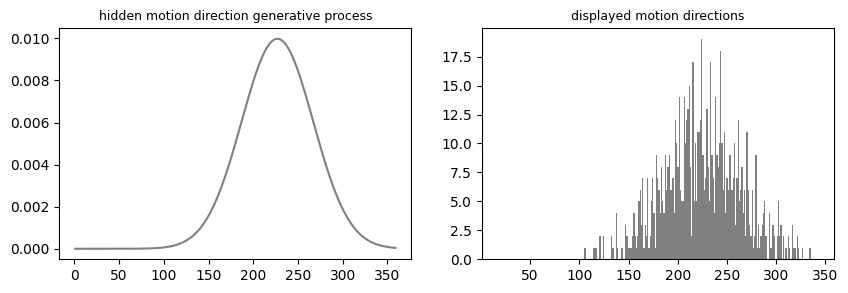

In [441]:
# set generative model parameters
MEAN = 227
STD = 40
N_TRIALS = 800
SEED = 0

# build generative model
pdf = build_generative_model(STD, MEAN)

# generate directions
directions_prior02 = generate_directions(mean=MEAN, std=STD, n_trials=N_TRIALS, seed=SEED)

# plot the generative process
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
ax1.plot(x, pdf, color= "gray");
ax1.set_title("hidden motion direction generative process", fontsize=9);

# plot generated motion direction distribution
ax2.hist(directions_prior02, color="gray", bins=180);
ax2.set_title("displayed motion directions", fontsize=9);
ax2.set_xlim([x[0], x[-1]]);

## Simulate prior learning

The learning model assumes that subjects use a state prediction error signal to update its prior belief.

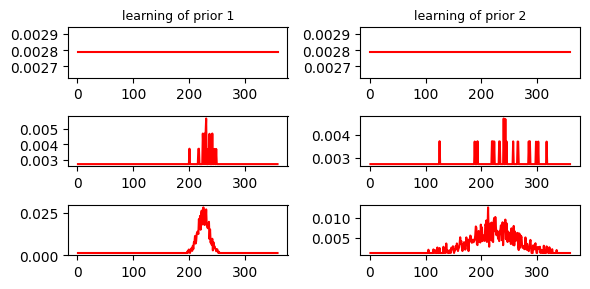

In [458]:
# learn model 1
priors01 = learn_generative_process(directions_prior01, learning_rate=0.001, x=x, n_trials=800)

# learn model 2
priors02 = learn_generative_process(directions_prior02, learning_rate=0.001, x=x, n_trials=800)

# figure
fig, axes = plt.subplots(3,2, figsize=(6,3))

# plot model 1
axes[0,0].plot(x, initial_prior, color= "r");
axes[1,0].plot(x, priors01[20], color= "r");
axes[2,0].plot(x, priors01[-1], color="r");
axes[0,0].set_title("learning of prior 1", fontsize=9)

# plot model 2
axes[0,1].plot(x, initial_prior, color="r");
axes[1,1].plot(x, priors02[20], color="r");
axes[2,1].plot(x, priors02[-1], color="r");
axes[0,1].set_title("learning of prior 2", fontsize=9)

plt.tight_layout()